In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
print(tf.__version__)

1.2.1


In [3]:
import basic_keras_tf as b

# Compare Learning Rates

In [4]:
plt.style.use('ggplot')

In [5]:
figsize=(20, 5)

In [6]:
def plot_lr(lr):
    m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)
    h = b.train(m, 4, lr, b.lstm_batchsize, verbose=0)
    return [x for i in range(len(h)) for x in h[i].history['loss']]

In [7]:
plots = {                       "1e-1": plot_lr(1e-1),
         "5e-2": plot_lr(5e-2), "1e-2": plot_lr(1e-2),
         "5e-3": plot_lr(5e-3), "1e-3": plot_lr(1e-3),
         "5e-4": plot_lr(5e-4), "1e-4": plot_lr(1e-4)}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 1)           264       
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________
None
x shape:  (128, 100, 1)
x shape:  (128, 100, 1)
x shape:  (128, 100, 1)
x shape:  (128, 100, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 1)           264       
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________

In [8]:
npplots = {}
for k in plots.keys():
    npplots[k] = np.array(plots[k])

In [9]:
for k in npplots.keys():
    plots[k] = npplots[k].clip(max=1.0)

In [10]:
plot = pd.DataFrame(plots)

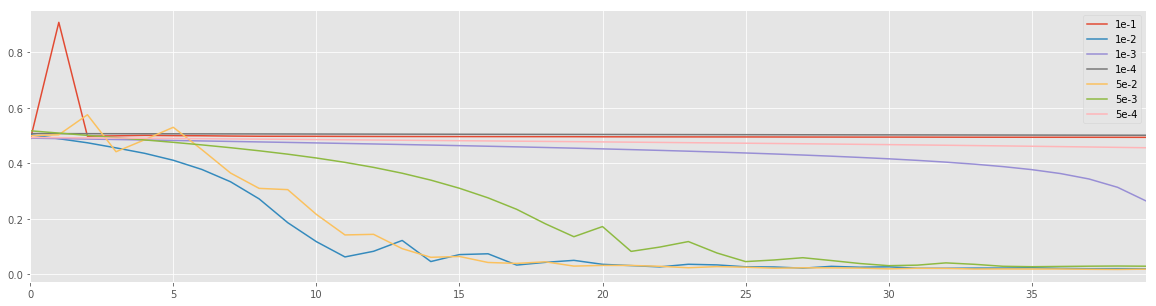

In [11]:
plot.plot(figsize=figsize)

# Load Up Trained Model

In [12]:
m = b.TSModel(b.lstm_timesteps, b.lstm_batchsize)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, None, 64)          16896     
_________________________________________________________________
lstm_16 (LSTM)               (None, None, 1)           264       
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
m.m.load_weights('keras_tf_24_1e-2.h5')

# Test Some Predictions

In [14]:
from singen import SinGen

In [15]:
g = SinGen(timesteps=b.lstm_timesteps)

In [16]:
x, y = g.batch()

In [17]:
y_ = m.m.predict(x, batch_size=1)

In [18]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [19]:
plt.style.use('ggplot')

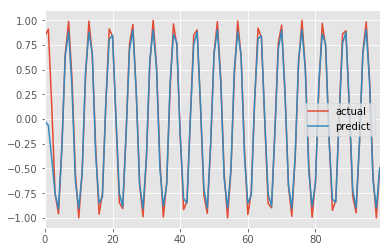

In [20]:
res.plot()

In [21]:
x, y = g.batch()
y_ = m.m.predict(x, batch_size=1)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

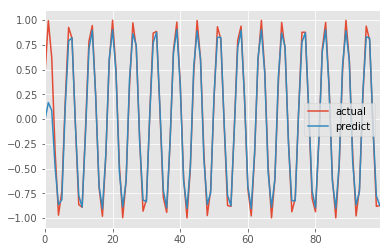

In [22]:
res.plot()

In [23]:
m.m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, None, 64)          16896     
_________________________________________________________________
lstm_16 (LSTM)               (None, None, 1)           264       
Total params: 17,160
Trainable params: 17,160
Non-trainable params: 0
_________________________________________________________________


# See How Far It Can Run

In [24]:
figsize=(20, 5)

In [25]:
x, y = g.batch()

In [26]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [27]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.m.predict(xs, batch_size=1)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [28]:
fx, fy = gen_future(2)

In [29]:
pfy = pred_future(x, 2)

## Here is what this looks like:

###  Note that the blue values are all generated from the LSTM - none of these are coming from the generator

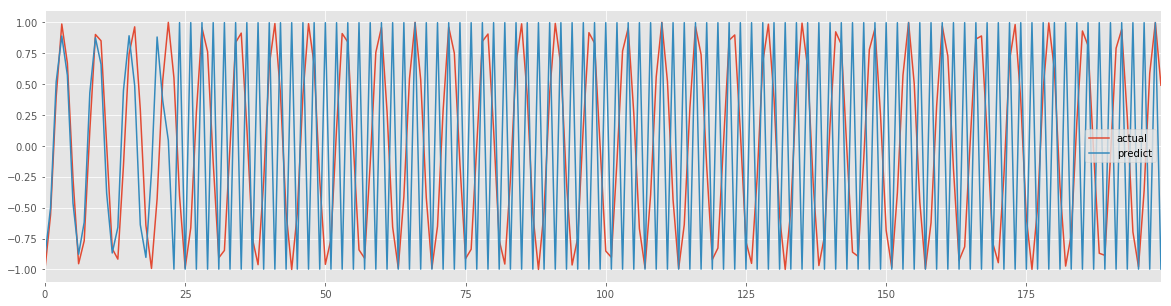

In [30]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [31]:
showpoints=10

In [32]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,-0.999756,-0.895736
1,-0.558764,-0.501195
2,0.395953,0.517152
3,0.986633,0.889269
4,0.670207,0.571927
5,-0.262404,-0.463896
6,-0.953762,-0.877043
7,-0.768235,-0.618144
8,0.123603,0.429741
9,0.901801,0.875071
